<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")

#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")

#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df_web[:3]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
df_erp[:3]

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock


In [ ]:
df_liaison[:3]

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'étudiant va être très certainement confronté à des difficultés pour ouvrir ce fichier.
Il faudra donc qu'il se documente sur les points suivants:<br>
- notion d'encodage en informatique. ("UTF-8", "ISO-8859-1", etc)<br>
- manipulation de fichier csv, tsv, etc<br>
<br>
Pour lui faire réussir cette étape, l'étudiant devrait suivre ces directives:<br>
- Explorer le fichier à l'aide d'un outil comme Notepad++ afin de visualiser la structure du fichier<br>
- ... ou d'utiliser Excel pour les mêmes raisons. Mais dans ce cas l'étudiant pourrait être tenté de convertir le fichier csv en xlsx, ce que je ne recommande pas: si le fichier est trop gros pour Excel cela deviendra une souffrance de procéder ainsi<br>
- apprendre à ourvrir un fichier avec python à l'aide de l'instruction suivante: <code>with open(nom_fichier, "rb") as f: </code><br>
- utiliser une bibliothèque comme <code>chardet</code> pour tenter d'identifier l'encodage du fichier<br>
</div>

In [5]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
import chardet
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()

#Et affichons le:
#print(file)
chardet.detect(file)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [ ]:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [ ]:
#Vous avez dû constater que les champs sont séparées par des point-virgule
#tentons d'ouvrir le fichier avec pandas avec cet élément
#df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", encoding="ISO-8859-1", sep=";")
#df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", encoding="UTF-8", sep=";")
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", encoding="Windows-1252", sep=";")

In [ ]:
df_caracteristiques[:3]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"


# New Section

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [6]:
#Importation de la bibilothèque
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [7]:
#Identification de l'encodage du fichier

chardet.detect(file)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [255]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)
Le tableau dimensions (825, 5). 


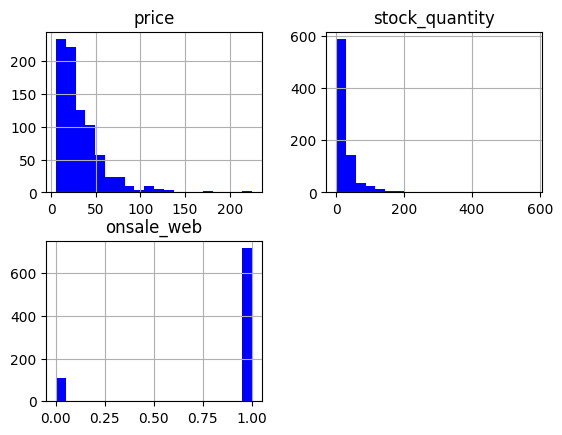

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))
print("Le tableau dimensions {}. ".format(df_erp.shape))
import matplotlib.pyplot as plt
df_erp.hist(bins=20, column=['price', 'stock_quantity', 'onsale_web'], color="blue");
plt.show()

In [10]:
#Consulter le nombre de colonnes
erp_columns_number = df_erp.shape[1]
print('Le nombre de colonnes = ', erp_columns_number)
#La nature des données dans chacune des colonnes
print("La nature des données dans chacune des colonnes c'est: ")
print(df_erp.dtypes)
print("Le type des données de la colonne 'price' c'est: ", df_erp.dtypes['price'])
#Le nombre de valeurs présentes dans chacune des colonnes
print('Solution 1:')
print(len(df_erp))
print(len(df_erp['product_id']))
print(df_erp.shape[0])
print('Solution 2:')
print(df_erp.info())


Le nombre de colonnes =  5
La nature des données dans chacune des colonnes c'est: 
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object
Le type des données de la colonne 'price' c'est:  float64
Solution 1:
825
825
825
Solution 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
None


In [ ]:
#Afficher les 5 premières lignes de la table
df_erp[:5]


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print("Nombre des lignes en doublons {}".format(len(df_erp[df_erp['product_id'].duplicated() == True])))


Nombre des lignes en doublons 0


In [11]:
#Afficher les valeurs distinctes de la colonne stock_status
print("Les valeurs distinctes de la colonne stock_status:")
print(df_erp[df_erp['stock_status'].duplicated() == False]['stock_status'])

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print(df_erp[df_erp['stock_status'].duplicated() == False])
# c'est liée à la colonne 'stock_quantity'


Les valeurs distinctes de la colonne stock_status:
0    outofstock
6       instock
Name: stock_status, dtype: object
   product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock
6        4041           1   32.7              15      instock


In [12]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
import numpy as np

df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] == 0, 'outofstock', 'instock')
print(df_erp[['stock_quantity', 'stock_status', 'stock_status_2']][:10])

   stock_quantity stock_status stock_status_2
0               0   outofstock     outofstock
1               0   outofstock     outofstock
2               0   outofstock     outofstock
3               0   outofstock     outofstock
4               0   outofstock     outofstock
5               0   outofstock     outofstock
6              15      instock        instock
7              34      instock        instock
8              12      instock        instock
9              66      instock        instock


In [13]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter


0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [14]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
print("True : ", len(df_erp[df_erp["stock_status"] == df_erp["stock_status_2"]]))
print("False : ", len(df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]))

True :  824
False :  1


In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [15]:
# Corriger la ou les données incohérentes
nb_diff = len(df_erp[df_erp["stock_status_2"] != df_erp["stock_status"]])
if nb_diff > 0:
  row_index = df_erp.index.get_loc(df_erp[df_erp["stock_status_2"] != df_erp["stock_status"]].index[0])
  df_erp.at[row_index, 'stock_status_2']=df_erp["stock_status"][row_index]

print("False : ", len(df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]))

False :  0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [16]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"

print("Nombres d'article avec un prix non renseignés: {}".format(len(df_erp[(df_erp['price'].isnull()) | (df_erp['price'] < 0)]))) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("le prix minimum de la colonne 'price' c'est: {}".format(min(df_erp['price'])))

#Afficher le prix maximum de la colonne "price"
print("le prix maximum de la colonne 'price' c'est: {}".format(max(df_erp['price'])))



Nombres d'article avec un prix non renseignés: 0
le prix minimum de la colonne 'price' c'est: 5.2
le prix maximum de la colonne 'price' c'est: 225.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [17]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("la quantité minimum de la colonne 'stock_quantity' c'est: {}".format(min(df_erp['stock_quantity'])))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("la quantité maximum de la colonne 'stock_quantity' c'est: {}".format(max(df_erp['stock_quantity'])))


la quantité minimum de la colonne 'stock_quantity' c'est: 0
la quantité maximum de la colonne 'stock_quantity' c'est: 578


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [18]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp[df_erp['onsale_web'].duplicated() == False]

# Significations:
# 1: le produit vendu sur le web
# 0: le produit n'est pas vendu sur le web


,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
19,4055,0,86.1,0,outofstock,outofstock


In [ ]:
#Quelles sont les colonnes à conserver selon vous?
# Les colonnes à conserver sont: product_id, onsale_web, price, et stock_quantity


In [19]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
if 'stock_status' in df_erp:
  df_erp.drop('stock_status', axis=1, inplace=True)

if 'stock_status_2' in df_erp:
  df_erp.drop('stock_status_2', axis=1, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


Les dimension (1513, 28)
Nombre d'observations 1513
Nombre de caractéristiques 28


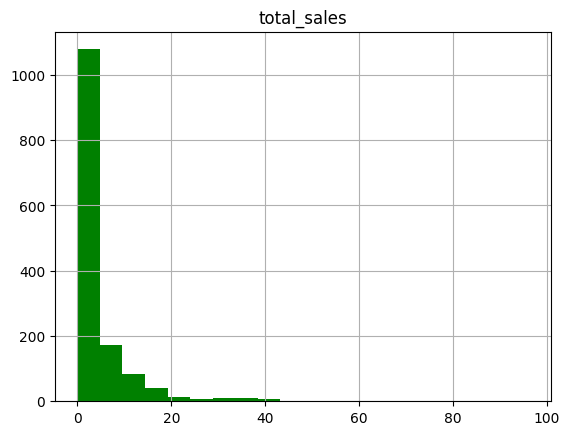

In [20]:
#Dimension du dataset
print("Les dimension {}".format(df_web.shape))

#Nombre d'observations
print("Nombre d'observations {}".format(df_web.shape[0]))

#Nombre de caractéristiques
print("Nombre de caractéristiques {}".format(df_web.shape[1]))
df_web.hist(bins=20,column=['total_sales'], color="green");

In [ ]:
#Consulter le nombre de colonnes
print("Nombre des colonnes {}".format(df_web.shape[1]))

#La nature des données dans chacune des colonnes
print("Nature des données dans chaque colonnes:")
print(df_web.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("Le de valeurs présentes dans chacune des colonnes:")
print(df_web.info())


Nombre des colonnes 28
Nature des données dans chaque colonnes:
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid            

In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?
# On conserve les colonnes qui contiennent des valeurs. Qui sont les suivantes:
# sku,virtual,downloadable,rating_count,average_rating,
# total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,
# post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,
# post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
# et les colonnes à supprimées qui ne contiennent aucune valeurs sont: tax_class, post_content, post_password, post_content_filtered.

In [21]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(columns=['tax_class', 'post_content', 'post_password', 'post_content_filtered'], axis=1, inplace=True, errors='ignore')

In [22]:
#Visualisation des valeurs de la colonne sku
df_web['sku']
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web[df_web['sku'].str.contains('[0-9]') == True]['sku']



0       bon-cadeau-25-euros
797                 13127-1
1209    bon-cadeau-25-euros
1511                13127-1
Name: sku, dtype: object

In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
# bon-cadeau-25-euros
# 13127-1

In [ ]:
df_web[(df_web['sku'] == 13127) | (df_web['sku'] == 13126) | (df_web['sku'] == '13127-1')][['sku', 'post_name']]

,sku,post_name
18,13127,clos-du-mont-olivet-chateauneuf-du-pape-2012
797,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2
816,13127,clos-du-mont-olivet-chateauneuf-du-pape-2012
1511,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [ ]:
df_web[df_web['post_name'] == 'clos-du-mont-olivet-chateauneuf-du-pape-2007-2'][['sku', 'post_name']]

,sku,post_name
797,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2
1511,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [ ]:
df_liaison[(df_liaison['id_web'] == 13127)|(df_liaison['id_web'] == 13126)]

,product_id,id_web
17,4053,13127


In [ ]:
df_caracteristiques[df_caracteristiques['post_name']=='clos-du-mont-olivet-chateauneuf-du-pape-2007-2']

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets


In [ ]:
df_web[df_web['sku'] == 'bon-cadeau-25-euros'][['sku', 'post_name']]

,sku,post_name
0,bon-cadeau-25-euros,bon-cadeau-de-25-euros
1209,bon-cadeau-25-euros,bon-cadeau-de-25-euros


In [ ]:
df_web[df_web['post_name'] == 'bon-cadeau-de-25-euros'][['sku', 'post_name']]

,sku,post_name
0,bon-cadeau-25-euros,bon-cadeau-de-25-euros
1209,bon-cadeau-25-euros,bon-cadeau-de-25-euros


In [23]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
# les articles avec le code 13127-1 n'ont pas des correspondances dans tous les autres fichiers alors ils vont pas être mergés avec les autres données
# donc il vaut mieux juste les supprimer
df_web.drop(df_web[df_web['sku'] == '13127-1'].index, inplace = True)
# pareil pour les articles avec le code sku 'bon-cadeau-25-euros'
df_web.drop(df_web[df_web['sku'] == 'bon-cadeau-25-euros'].index, inplace = True)

In [24]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
len(df_web[df_web['sku'].duplicated() == True]['sku'])
# Oui il y a des doublons


796

In [ ]:
#Identifier les lignes sans code articles
len(df_web[df_web['sku'].isnull() == True]['sku'])

85

In [25]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_without_sku = df_web[df_web['sku'].isnull() == True]

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web_without_sku.info()

#3 - Que constatez-vous?
# pour ces lignes de dataframe presque toutes les colonnes sont nulles
# à supprimer
df_web = df_web[df_web['sku'].isnull() == False]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  post_title         2 non-null      object        
 11  post_excerpt       2 non-null      object        
 12  post_status        2 non-null      object        
 13  comment_status     2 non-null      object        
 14  ping_stat

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
print('Dimension du dataset: {}'.format(df_liaison.shape))
#Nombre d'observations
print("Nombre d'observations: {}".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Nombre de caractéristiques: {}".format(df_liaison.shape[1]))

Dimension du dataset: (825, 2)
Nombre d'observations: 825
Nombre de caractéristiques: 2


In [ ]:
#Consulter le nombre de colonnes
print("Le nombre de colonnes: {}".format(df_liaison.shape[1]))
#La nature des données dans chacune des colonnes
print(df_liaison.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_liaison.info())

Le nombre de colonnes: 2
product_id     int64
id_web        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
print( "nombre des duplications de 'product_id': {}".format( len(df_liaison[df_liaison['product_id'].duplicated() == True]['product_id'])))

nombre des duplications de 'product_id': 0


In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
print( "nombre des duplications de 'id_web': {}".format( len(df_liaison[df_liaison['id_web'].duplicated() == True]['id_web'])))

nombre des duplications de 'id_web': 90


In [ ]:
#Avons-nous des articles sans correspondances?
print("Nombre des articles sans correspondances c'est: {}".format(len(df_liaison[df_liaison['id_web'].isnull() == True])))
# Oui

Nombre des articles sans correspondances c'est: 91


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

Dimension du dataset (611, 13)
Nombre d'observations 611
Nombre de caractéristiques 13


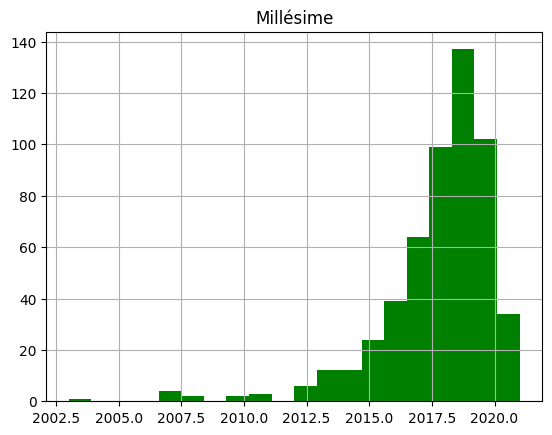

In [26]:
#Dimension du dataset
print("Dimension du dataset {}".format(df_caracteristiques.shape))
#Nombre d'observations
print("Nombre d'observations {}".format(df_caracteristiques.shape[0]))

#Nombre de caractéristiques
print("Nombre de caractéristiques {}".format(df_caracteristiques.shape[1]))
#df_caracteristiques.plot();
#df_caracteristiques.plot(kind='hist',alpha=0.5,bins=20);
df_caracteristiques.hist(bins=20,color="green");
plt.show()

In [ ]:
#Consulter le nombre de colonnes
print("Nombre des colonnes {}".format(df_caracteristiques.shape[1]))
#La nature des données dans chacune des colonnes
print("La nature des données dans chacune des colonnes c'est: ")
print(df_caracteristiques.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("Le nombre de valeurs présentes dans chacune des colonnes:")
print(df_caracteristiques.info())

Nombre des colonnes 13
La nature des données dans chacune des colonnes c'est: 
post_name                   object
poids                       object
Région                      object
Domaine                     object
Appellation                 object
Couleur                     object
Cépage                      object
Millésime                  float64
Garde                       object
Contenance                  object
Degré d'alcool              object
Température dégustation     object
Alliance mets               object
dtype: object
Le nombre de valeurs présentes dans chacune des colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_name                611 non-null    object 
 1   poids                    611 non-null    object 
 2   Région                   586 non-null    object 
 3   Domaine       

In [ ]:
#Affichage des 5 premières lignes du dataset
print(df_caracteristiques[:5])


                                           post_name   poids Région  \
0        pierre-jean-villa-saint-joseph-preface-2018  1.5 kg  Rhône   
1          pierre-jean-villa-saint-joseph-tilde-2017  1.5 kg  Rhône   
2  pierre-jean-villa-croze-hermitage-accroche-coe...  1.5 kg  Rhône   
3                  pierre-jean-villa-igp-gamine-2018  1.5 kg  Rhône   
4          pierre-jean-villa-cote-rotie-carmina-2017  1.5 kg  Rhône   

             Domaine            Appellation Couleur      Cépage  Millésime  \
0  Pierre Jean Villa           Saint Joseph   Rouge  100% Syrah     2020.0   
1  Pierre Jean Villa           Saint Joseph   Rouge  100% Syrah     2019.0   
2  Pierre Jean Villa       Crozes-Hermitage   Rouge  100% Syrah     2020.0   
3  Pierre Jean Villa  Collines Rhodaniennes   Rouge  100% Syrah     2020.0   
4  Pierre Jean Villa             Côte Rôtie   Rouge  100% Syrah     2019.0   

       Garde Contenance Degré d'alcool Température dégustation  \
0    4-7 ans       75cl            13%

In [251]:
# Vérification des doublons et valeurs non renseignées de la colonne 'post_name'
print("Nombre des lignes en doublons {}".format(len(df_caracteristiques[df_caracteristiques['post_name'].duplicated() == True])))
print("Identifier les lignes sans post_name: {}".format(len(df_caracteristiques[df_caracteristiques['post_name'].isnull() == True]['post_name'])))


Nombre des lignes en doublons 0
Identifier les lignes sans post_name: 0


In [256]:
#Quels sont les produits avec des informations manquantes?
df_without_all_data = df_caracteristiques[(df_caracteristiques['Région'].isnull() == True) | (df_caracteristiques['Domaine'].isnull() == True )
| (df_caracteristiques['Appellation'].isnull() == True) | (df_caracteristiques['Couleur'].isnull() == True)
| (df_caracteristiques['Cépage'].isnull() == True) | (df_caracteristiques['Millésime'].isnull() == True)
| (df_caracteristiques['Garde'].isnull() == True) | (df_caracteristiques["Degré d'alcool"].isnull() == True )
| (df_caracteristiques["Température dégustation"].isnull() == True) | (df_caracteristiques["Alliance mets"].isnull() == True) ]

In [258]:
df_without_all_data

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
66,champagne-mailly-grand-cru-intemporelle-rose-2009,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"40% Chardonnay, 60% Pinot Noir",NaN,10 ans et +,75cl,12%,10°C,"Apéritif, Fruits, Noix de St Jacques, Poissons"
67,champagne-mailly-grand-cru-intemporelle-2010,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"40% Chardonnay, 60% Pinot Noir",NaN,10 ans et +,75cl,12%,10°C,"Apéritif, Fruits, Noix de St Jacques, Poissons"
116,domaine-montrose-cotes-de-thongue-rose-2019,1.5 kg,Languedoc-Roussillon,Domaine Montrose,Côtes de Thongue,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2021.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade"
125,frissant-chenin-pierres-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Blanc,Chenin,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson grillé, Viande Blanche"
126,xavier-frissant-touraine-roses-du-clos-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine,Blanc,Fié Gris,2019.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson en sauce, Viande Blanche"


In [ ]:
#Est-il possible de corriger les données manquantes?
# oui

In [260]:
# Corriger les couleurs manquantes
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (
     (df_caracteristiques['post_name'].str.contains('champagne'))|
     (df_caracteristiques['post_name'].str.contains('whisky'))
  ), 'Couleur'] = 'Blanc';

# la couleur de domaine-serol-mousseux-turbullent est Rosé
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'domaine-serol-mousseux-turbullent'), 'Couleur'] = 'Rosé';

# Les vins co ont une couleur ambrée
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name'].str.contains('cognac')), 'Couleur'] = 'Ambrée';

# Les vins marcel-windholtz ont une couleur Rosé
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name'].str.contains('marcel-windholtz')), 'Couleur'] = 'Rosé';
# Les autres

df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'maurice-schoech-cremant-dalsace-brut-rose-bulles-de-granite'), 'Couleur'] = 'Rosé';
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'emile-boeckel-cremant-brut-rose'), 'Couleur'] = 'Rosé';
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'huile-olive-planeta-3l'), 'Couleur'] = 'Vert-Jaune';
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'huile-dolive-extra-vierge-planeta-50cl'), 'Couleur'] = 'Vert-Jaune';
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'huile-dolive-extra-vierge-planeta-3x-10cl'), 'Couleur'] = 'Vert-Jaune';
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'darnleys-london-dry-gin-spiced'), 'Couleur'] = 'Blanc';
df_caracteristiques.loc[(df_caracteristiques['Couleur'].isnull()) & (df_caracteristiques['post_name']== 'darnleys-london-dry-gin-original'), 'Couleur'] = 'Blanc';

In [261]:
# Vérifier si il reste des couleurs pas renseignées?
len(df_caracteristiques[df_caracteristiques['Couleur'].isnull()])

0

In [263]:
# Corriger les données manquantes de 'Millésime'
df_caracteristiques.loc[(df_caracteristiques['Millésime'].isnull()) & (df_caracteristiques['post_name'].str.contains('-20')), 'Millésime'] = df_caracteristiques['post_name'].str[-4:];

In [266]:
# Température dégustation
# Selon couleur
# blanc et Rosé=> 10°C
# Ambrée => 17°
df_caracteristiques.loc[(df_caracteristiques['Température dégustation'].isnull()) & (df_caracteristiques['Couleur']== 'Blanc'), 'Température dégustation'] = '10°C';
df_caracteristiques.loc[(df_caracteristiques['Température dégustation'].isnull()) & (df_caracteristiques['Couleur'] == 'Rosé'), 'Température dégustation'] = '10°C';
df_caracteristiques.loc[(df_caracteristiques['Température dégustation'].isnull()) & (df_caracteristiques['Couleur'] == 'Ambrée'), 'Température dégustation'] = '17°C';

In [267]:
# Vérification du résultat
len(df_caracteristiques[df_caracteristiques['Température dégustation'].isnull()])

3

In [269]:
# Appellation
df_caracteristiques.loc[(df_caracteristiques['Appellation'].isnull()) & (df_caracteristiques['post_name'].str.contains('whisky')), 'Appellation'] = 'Whisky';
df_caracteristiques.loc[(df_caracteristiques['Appellation'].isnull()) & (df_caracteristiques['post_name'].str.contains('marcel')), 'Appellation'] = 'Marcel';
df_caracteristiques.loc[(df_caracteristiques['Appellation'].isnull()) & (df_caracteristiques['post_name'].str.contains('gin')), 'Appellation'] = 'Gin';

In [272]:
# Correction des données manquantes de Cépage
df_caracteristiques.loc[(df_caracteristiques['Cépage'].isnull()) & (df_caracteristiques['post_name'].str.contains('whisky')), 'Cépage'] = 'Grenache';
df_caracteristiques.loc[(df_caracteristiques['Cépage'].isnull()) & (df_caracteristiques['post_name'].str.contains('marcel')), 'Cépage'] = 'Pinot noir';

In [275]:
# Corriger les données manquantes: 'Domaine'
df_caracteristiques.loc[(df_caracteristiques['Domaine'].isnull()) & (df_caracteristiques['post_name'].str.contains('the-hive')), 'Domaine'] = 'The hive';
df_caracteristiques.loc[(df_caracteristiques['Domaine'].isnull()) & (df_caracteristiques['post_name'].str.contains('treacle-chest')), 'Domaine'] = 'Treacle Chest';
df_caracteristiques.loc[(df_caracteristiques['Domaine'].isnull()) & (df_caracteristiques['post_name'].str.contains('vanilla-burst')), 'Domaine'] = 'Vanilla Brust';
df_caracteristiques.loc[(df_caracteristiques['Domaine'].isnull()) & (df_caracteristiques['post_name'].str.contains('peat-chimney')), 'Domaine'] = 'Peat Chimey';
df_caracteristiques.loc[(df_caracteristiques['Domaine'].isnull()) & (df_caracteristiques['post_name'].str.contains('spice-king')), 'Domaine'] = 'Spice King';
df_caracteristiques.loc[(df_caracteristiques['Domaine'].isnull()) & (df_caracteristiques['post_name'].str.contains('eau-de-vie')), 'Domaine'] = 'Eaux de vie';
df_caracteristiques.loc[(df_caracteristiques['Domaine'].isnull()) & (df_caracteristiques['post_name'].str.contains('dry-gin')), 'Domaine'] = 'Dry gin';

In [278]:
# Alliance mets
df_caracteristiques.loc[(df_caracteristiques['Alliance mets'].isnull()) & (df_caracteristiques['post_name'].str.contains('whisky')), 'Alliance mets'] = 'Apéritif, Crustacés, Desserts, Poissons';

In [281]:
# Garde
df_caracteristiques.loc[(df_caracteristiques['Garde'].isnull()) & (df_caracteristiques['post_name'].str.contains('whisky')), 'Garde'] = '3-5 ans';
df_caracteristiques.loc[(df_caracteristiques['Garde'].isnull()) & (df_caracteristiques['post_name'].str.contains('marcel-windholtz')), 'Garde'] = '3-5 ans';

In [284]:
df_caracteristiques.loc[(df_caracteristiques['Degré d\'alcool'].isnull()) & (df_caracteristiques['post_name'].str.contains('pelle-menetou')), 'Degré d\'alcool'] = '13%';
df_caracteristiques.loc[(df_caracteristiques['Degré d\'alcool'].isnull()) & (df_caracteristiques['post_name'].str.contains('domaine-rotier')), 'Degré d\'alcool'] = '12.5%';
df_caracteristiques.loc[(df_caracteristiques['Degré d\'alcool'].isnull()) & (df_caracteristiques['post_name'].str.contains('xavier-frissant')), 'Degré d\'alcool'] = '13%';
df_caracteristiques.loc[(df_caracteristiques['Degré d\'alcool'].isnull()) & (df_caracteristiques['post_name'].str.contains('pierre-martin-sancerre')), 'Degré d\'alcool'] = '13.5%';

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [287]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp,df_liaison, left_on='product_id', right_on='product_id')

In [288]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
len(df_merge[df_merge['product_id'].isnull() == True])
# Non. Toutes les lignes "matchent"

0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [289]:
#Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(df_merge,df_web, left_on='id_web', right_on='sku')

In [290]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 0 to 1423
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         1424 non-null   int64         
 1   onsale_web         1424 non-null   int64         
 2   price              1424 non-null   float64       
 3   stock_quantity     1424 non-null   int64         
 4   id_web             1424 non-null   object        
 5   sku                1424 non-null   object        
 6   virtual            1424 non-null   int64         
 7   downloadable       1424 non-null   int64         
 8   rating_count       1424 non-null   int64         
 9   average_rating     1424 non-null   float64       
 10  total_sales        1424 non-null   float64       
 11  tax_status         712 non-null    object        
 12  post_author        1424 non-null   float64       
 13  post_date          1424 non-null   datetime64[ns]
 14  post_dat

In [291]:
#Avons-nous des lignes sans correspondances?
print(len(df_merge[(df_merge['id_web'].isnull() == True) | (df_merge['sku'].isnull() == True)]))
# non


0


In [292]:
df_merge.drop('sku', axis=1, inplace=True, errors='ignore')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [293]:
#Fusion de la table df_merge et df_caracteristiques
df_merge = pd.merge(df_merge,df_caracteristiques, left_on='post_name', right_on='post_name')

In [35]:
print(len(df_merge[df_merge['post_name'].isnull() == True]))

0


In [295]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222 entries, 0 to 1221
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               1222 non-null   int64         
 1   onsale_web               1222 non-null   int64         
 2   price                    1222 non-null   float64       
 3   stock_quantity           1222 non-null   int64         
 4   id_web                   1222 non-null   object        
 5   virtual                  1222 non-null   int64         
 6   downloadable             1222 non-null   int64         
 7   rating_count             1222 non-null   int64         
 8   average_rating           1222 non-null   float64       
 9   total_sales              1222 non-null   float64       
 10  tax_status               611 non-null    object        
 11  post_author              1222 non-null   float64       
 12  post_date                1222 non-

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

<Axes: >

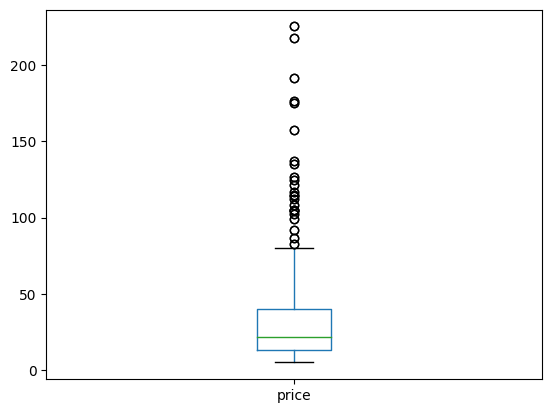

In [296]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column =['price'], grid = False)

In [297]:
#Autre méthode avec plotly express
fig = px.box(df_merge, y="price")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [298]:
#Calculer la moyenne du prix
total_prices = sum(df_merge['price'])
prix_moyen = total_prices/len(df_merge)
print("Prix moyen: {}".format(prix_moyen))

#Calculer l'écart-type du prix
import math
variance = sum((df_merge['price'] - prix_moyen)**2)/len(df_merge)
# print("Variance: {}".format(variance))
standardDeviation = math.sqrt(variance)
print("écart-type: {}".format(standardDeviation))


#Calculer le Z-score
# z = (X – μ) / σ
z_score_1 = (df_merge['price'] - prix_moyen)/standardDeviation

import scipy.stats as stats
z_score_2 = stats.zscore(df_merge['price'])
df_merge['z_score'] = stats.zscore(df_merge['price'])


Prix moyen: 31.369558101473
écart-type: 27.906281484388135


In [299]:
df_merge['z_score'][:5]

0   -0.256916
1   -0.256916
2    0.105010
3    0.105010
4   -0.378752
Name: z_score, dtype: float64

In [300]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_merge[df_merge['z_score']>3].sort_values(by='z_score', ascending=True )[:1]['price']

1115    116.4
Name: price, dtype: float64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [301]:
df_merge['price'].describe()

count    1222.000000
mean       31.369558
std        27.917707
min         5.200000
25%        13.500000
50%        22.100000
75%        40.425000
max       225.000000
Name: price, dtype: float64

In [302]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
# L'étendue​​
etendue = df_merge['price'].describe()['max'] - df_merge['price'].describe()['min'];
print("L'étendue​​= {}".format(etendue))

# Les quartiles
q1 = df_merge['price'].describe()['25%']
q2 = df_merge['price'].describe()['50%']
q3 = df_merge['price'].describe()['75%']

print("Q1: {}".format(q1))
print("Q2: {}".format(q2))
print("Q3: {}".format(q3))

# Interval interquartile
intervalInterquartile = q3 - q1
print("Interval interquartile= {}".format(intervalInterquartile))

# L'écart-type
standardDeviation = df_merge['price'].describe()['std']
print("écart-type: {}".format(standardDeviation))


L'étendue​​= 219.8
Q1: 13.5
Q2: 22.1
Q3: 40.425
Interval interquartile= 26.924999999999997
écart-type: 27.91770677923095


In [304]:
#Définissez un seuil pour les articles "outliers" en prix
# z-score min 2
seuil_prix = df_merge[df_merge['z_score']>2].sort_values(by='z_score', ascending=True )[:1]['price']
print("Seuil prix: {}".format(seuil_prix))
# 92
# A partir de graphe
# seuil_prix = 80

Seuil prix: 886    92.0
Name: price, dtype: float64


In [305]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
nb_outliers = len(df_merge[df_merge['price']>80])
print("Nombre d'articles outliers {}".format(nb_outliers))

Nombre d'articles outliers 48


In [306]:
df_merge[df_merge['price']>80].sort_values(by='price', ascending=False )[['post_name', 'price']]

,post_name,price
372,champagne-egly-ouriet-grand-cru-millesime-2008,225.0
373,champagne-egly-ouriet-grand-cru-millesime-2008,225.0
767,david-duband-charmes-chambertin-grand-cru-2014,217.5
766,david-duband-charmes-chambertin-grand-cru-2014,217.5
1029,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3
1028,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3
408,cognac-frapin-vip-xo,176.0
409,cognac-frapin-vip-xo,176.0
974,camille-giroud-clos-de-vougeot-2016,175.0
975,camille-giroud-clos-de-vougeot-2016,175.0


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#oui ces outliers sont justifiés
#ces sont généralement des vins de lux cher tels que: champagne-egly-ouriet-grand-cru-millesime-2008,
# et david-duband-charmes-chambertin-grand-cru-2014.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [307]:
##############################
# Calculer le CA sur site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['ca_par_article'] = df_merge['total_sales'] * df_merge['price']

#Calculez la somme de la colonne "ca_par_article"
ca_total = sum(df_merge['ca_par_article'])
print("Somme de CA par article {}".format(ca_total))

#Ce résultat correspond au chiffre d'affaire du site web


Somme de CA par article 127274.79999999987


In [308]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge.sort_values(by='ca_par_article', ascending=False, inplace=True)

#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(inplace=True)

#Afficher les 20 premier articles en CA
twenty_ca = df_merge['ca_par_article'][:20]

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(twenty_ca, y='ca_par_article')
fig.show()


In [309]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['percent_ca'] = df_merge['ca_par_article']/ca_total * 100;

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['ca_percent_cum'] = df_merge['percent_ca'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
nb_articles_80_ca = len(df_merge[df_merge['ca_percent_cum']<= 80])
print("nombre d'articles représentant 80% du CA est {}".format(nb_articles_80_ca))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("ce groupe représente {} % du catalogue entier du site web".format(nb_articles_80_ca/len(df_merge) * 100))

nombre d'articles représentant 80% du CA est 227
ce groupe représente 18.57610474631751 % du catalogue entier du site web


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [310]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge.sort_values(by='total_sales', ascending=False, inplace=True)

#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en quantité
twenty_total_sales = df_merge['total_sales'][:20]
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(twenty_total_sales, y='total_sales')
fig.show()

In [311]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
total_sales = sum(df_merge['total_sales'])

df_merge['percent_total_sales'] = df_merge['total_sales']/total_sales * 100;

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['percent_total_sales_cum'] = df_merge['percent_total_sales'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
nb_total_sales_80 = len(df_merge[df_merge['percent_total_sales_cum']<= 80])
print("nombre d'articles représentant 80% des ventes en quantité est {}".format(nb_total_sales_80))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("ce groupe représente {} % du catalogue entier du site web".format(nb_total_sales_80/len(df_merge) * 100))

nombre d'articles représentant 80% des ventes en quantité est 269
ce groupe représente 22.013093289689035 % du catalogue entier du site web


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [313]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
df_merge.to_excel("df_merge.xlsx")